<a href="https://colab.research.google.com/github/sumayabai/Credit-Card-Default-Prediction-Using-Machine-Learning/blob/main/Credit_Card_Default_Prediction_Capstone_Project_ipynb(Sumaya_Bai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [4]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#importing the excel file into pandas
df = pd.DataFrame(pd.read_excel('/content/drive/My Drive/Capstone 3/default of credit card clients.xls'))
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
df.info

<bound method DataFrame.info of       Unnamed: 0         X1  ...       X23                           Y
0             ID  LIMIT_BAL  ...  PAY_AMT6  default payment next month
1              1      20000  ...         0                           1
2              2     120000  ...      2000                           1
3              3      90000  ...      5000                           0
4              4      50000  ...      1000                           0
...          ...        ...  ...       ...                         ...
29996      29996     220000  ...      1000                           0
29997      29997     150000  ...         0                           0
29998      29998      30000  ...      3100                           1
29999      29999      80000  ...      1804                           1
30000      30000      50000  ...      1000                           1

[30001 rows x 25 columns]>

In [ ]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0         X1  ...       X23                           Y
0             ID  LIMIT_BAL  ...  PAY_AMT6  default payment next month
1              1      20000  ...         0                           1
2              2     120000  ...      2000                           1
3              3      90000  ...      5000                           0
4              4      50000  ...      1000                           0
...          ...        ...  ...       ...                         ...
29996      29996     220000  ...      1000                           0
29997      29997     150000  ...         0                           0
29998      29998      30000  ...      3100                           1
29999      29999      80000  ...      1804                           1
30000      30000      50000  ...      1000                           1

[30001 rows x 25 columns]>

In [ ]:
df.tail()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
#renaming the columns for better understanding
df.columns = ['ID', 'Credit_given', 'Gender', 'Education','Marriage', 'Age', 'Paymment_his_april',
       'Paymment_his_may', 'Paymment_his_june', 'Paymment_his_july', 'Paymment_his_august', 'Paymment_his_sept', 'BILL_AMT_april',
       'BILL_AMT_may', 'BILL_AMT_june', 'BILL_AMT_july', 'BILL_AMT_august','BILL_AMT_sept','PAY_AMT_april','PAY_AMT_may','PAY_AMT_june','PAY_AMT_july','PAY_AMT_august','PAY_AMT_sept','Next_month_default']

In [ ]:
df.head()

,ID,Credit_given,Gender,Education,Marriage,Age,Paymment_his_april,Paymment_his_may,Paymment_his_june,Paymment_his_july,Paymment_his_august,Paymment_his_sept,BILL_AMT_april,BILL_AMT_may,BILL_AMT_june,BILL_AMT_july,BILL_AMT_august,BILL_AMT_sept,PAY_AMT_april,PAY_AMT_may,PAY_AMT_june,PAY_AMT_july,PAY_AMT_august,PAY_AMT_sept,Next_month_default
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
df.isnull().sum()

ID                     0
Credit_given           0
Gender                 0
Education              0
Marriage               0
Age                    0
Paymment_his_april     0
Paymment_his_may       0
Paymment_his_june      0
Paymment_his_july      0
Paymment_his_august    0
Paymment_his_sept      0
BILL_AMT_april         0
BILL_AMT_may           0
BILL_AMT_june          0
BILL_AMT_july          0
BILL_AMT_august        0
BILL_AMT_sept          0
PAY_AMT_april          0
PAY_AMT_may            0
PAY_AMT_june           0
PAY_AMT_july           0
PAY_AMT_august         0
PAY_AMT_sept           0
Next_month_default     0
dtype: int64

In [ ]:
df.describe().T

,count,unique,top,freq
ID,30000,30000,30000,1
Credit_given,30000,81,50000,3365
Gender,30000,2,2,18112
Education,30000,7,2,14030
Marriage,30000,4,2,15964
Age,30000,56,29,1605
Paymment_his_april,30000,11,0,14737
Paymment_his_may,30000,11,0,15730
Paymment_his_june,30000,11,0,15764
Paymment_his_july,30000,11,0,16455


EDA and Data Visualization

In [9]:
#drop the label
df = df.drop(labels=0, axis=0)

In [ ]:
df.head()

,ID,Credit_given,Gender,Education,Marriage,Age,Paymment_his_april,Paymment_his_may,Paymment_his_june,Paymment_his_july,Paymment_his_august,Paymment_his_sept,BILL_AMT_april,BILL_AMT_may,BILL_AMT_june,BILL_AMT_july,BILL_AMT_august,BILL_AMT_sept,PAY_AMT_april,PAY_AMT_may,PAY_AMT_june,PAY_AMT_july,PAY_AMT_august,PAY_AMT_sept,Next_month_default
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df['Next_month_default'].value_counts()

0    23364
1     6636
Name: Next_month_default, dtype: int64

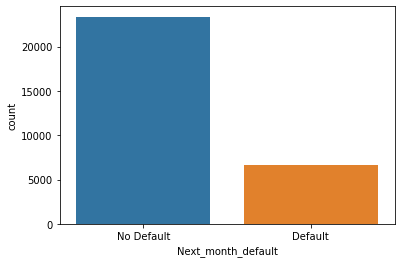

In [10]:
ax = sns.countplot(x="Next_month_default", data=df)
tick_val=[0,1 ]
tick_lab=['No Default','Default']
plt.xticks(tick_val, tick_lab)
plt.show()

Imbalanced dataset due to oversampling. I'll be dealing with sampling techniques to make it a perfectly balanced dataset.



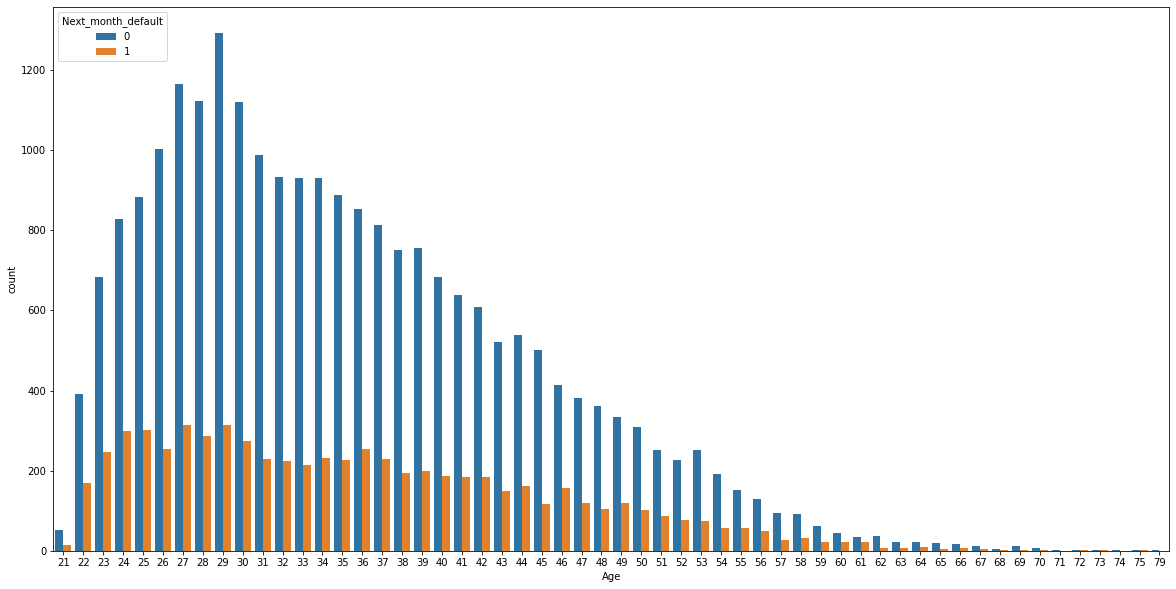

In [11]:
plt.figure(figsize=[20, 10])
sns.countplot(x = 'Age', hue = 'Next_month_default', data =df)


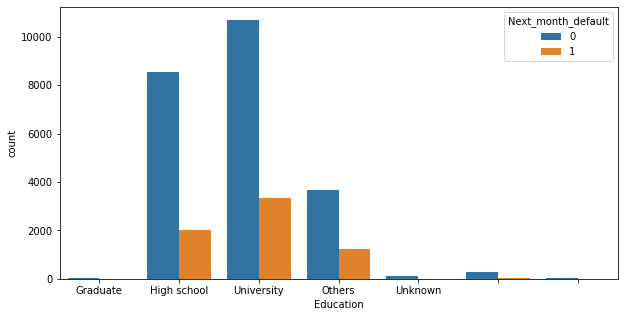

In [ ]:
plt.figure(figsize=[10, 5])
eduplot = sns.countplot(x = 'Education', hue = 'Next_month_default', data =df)

tick_val=[0,1 , 2, 3,4,5,6]
tick_lab=['Graduate','High school','University','Others','Unknown']
plt.xticks(tick_val, tick_lab)
plt.show()

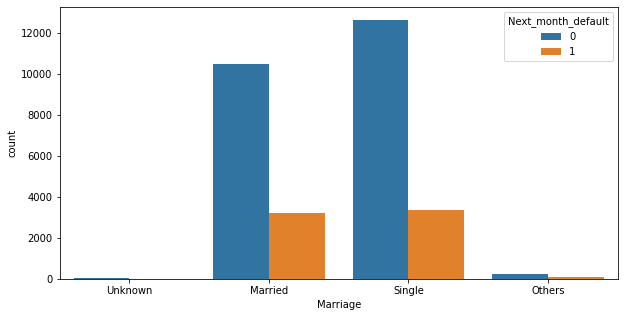

In [ ]:
plt.figure(figsize=[10, 5])
sns.countplot(x = 'Marriage', hue = 'Next_month_default', data =df)

tick_val=[0,1 , 2, 3]
tick_lab=['Unknown','Married','Single','Others']
plt.xticks(tick_val, tick_lab)
plt.show()

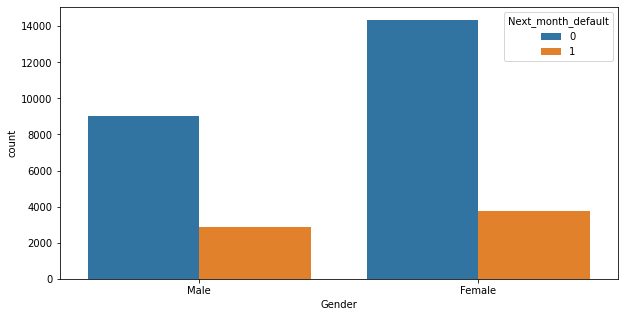

In [ ]:
plt.figure(figsize=[10, 5])
sns.countplot(x = 'Gender', hue = 'Next_month_default', data =df)

tick_val=[0,1 ]
tick_lab=['Male','Female']
plt.xticks(tick_val, tick_lab)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


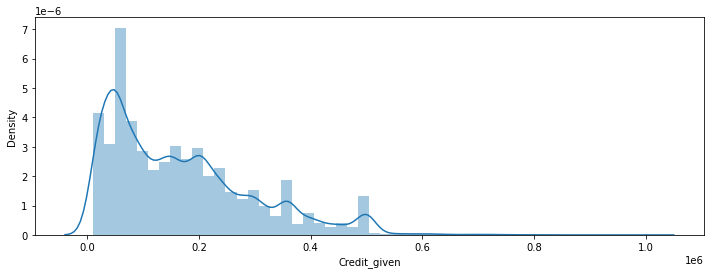

In [ ]:
plt.figure(figsize=(12,4))

sns.distplot(df['Credit_given'])

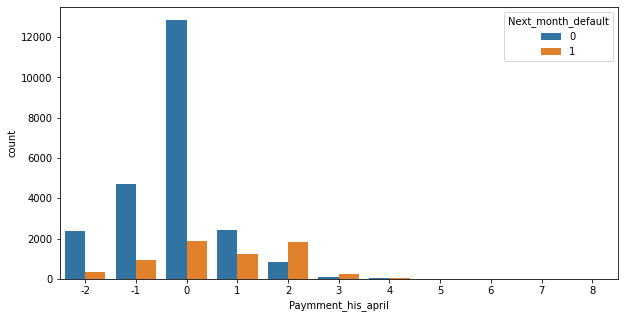

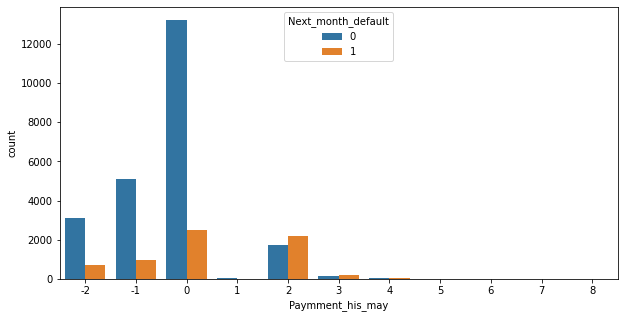

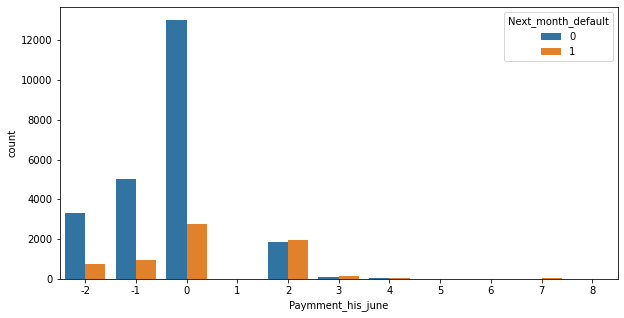

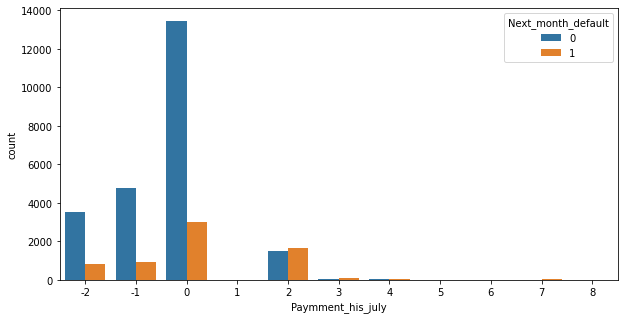

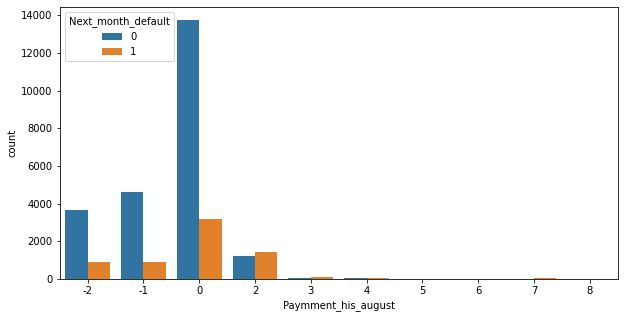

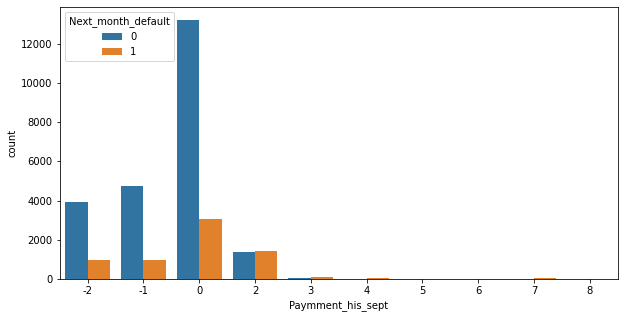

In [ ]:
payment_history_df = ['Paymment_his_april',	'Paymment_his_may',	'Paymment_his_june',	'Paymment_his_july',	'Paymment_his_august',	'Paymment_his_sept']
for col in payment_history_df:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Next_month_default', data = df)

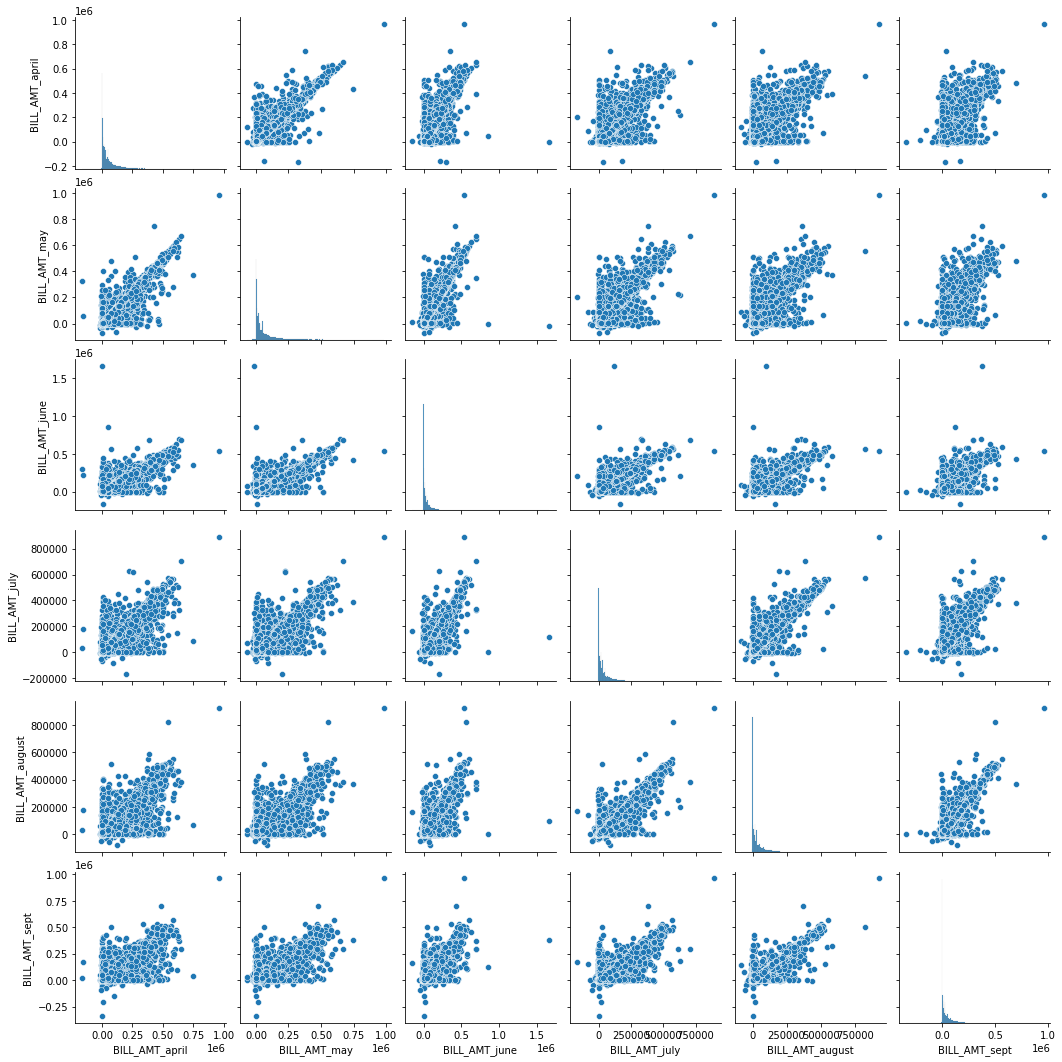

In [ ]:
BILL_AMT_df = df[['BILL_AMT_april',	'BILL_AMT_may',	'BILL_AMT_june',	'BILL_AMT_july',	'BILL_AMT_august',	'BILL_AMT_sept']]
# for col in BILL_AMT_df:
#   plt.figure(figsize=(10,5))
#   sns.countplot(x = col, hue = 'Next_month_default', data = df)

sns.pairplot(data = BILL_AMT_df)

In [ ]:
df.head()

,ID,Credit_given,Gender,Education,Marriage,Age,Paymment_his_april,Paymment_his_may,Paymment_his_june,Paymment_his_july,Paymment_his_august,Paymment_his_sept,BILL_AMT_april,BILL_AMT_may,BILL_AMT_june,BILL_AMT_july,BILL_AMT_august,BILL_AMT_sept,PAY_AMT_april,PAY_AMT_may,PAY_AMT_june,PAY_AMT_july,PAY_AMT_august,PAY_AMT_sept,Next_month_default
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Overcoming Data Imbalancing 

Depenedent Variable : Next_month_default seems to be imbalanced.
To overcome this, two techniques of oversampling is used:
1. Random Oversampling and undersampling
2. SMOTE 

In [ ]:
#1.random oversampling

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(df.iloc[:,0:-1], df['Next_month_default'])





/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_ros))

Original dataset shape 30000
Resampled dataset shape 46728


In [ ]:
columns = list(df.columns)

In [ ]:
columns.pop()

'Next_month_default'

In [ ]:
oversampled_df = pd.DataFrame(X_ros, columns=columns)
oversampled_df['Next_month_default'] = y_ros 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


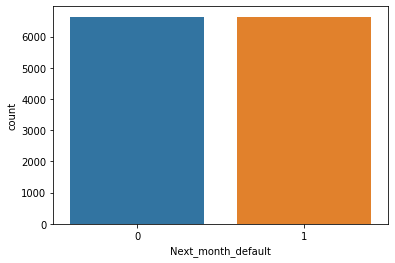

In [ ]:
sns.countplot('Next_month_default', data = undersampled_df)

In [ ]:
#random undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(df.iloc[:,0:-1], df['Next_month_default'])


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_rus))

Original dataset shape 30000
Resampled dataset shape 13272


In [ ]:
columns = list(df.columns)

In [ ]:
columns.pop()

'Next_month_default'

In [ ]:
undersampled_df = pd.DataFrame(X_rus, columns=columns)
undersampled_df['Next_month_default'] = y_rus 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


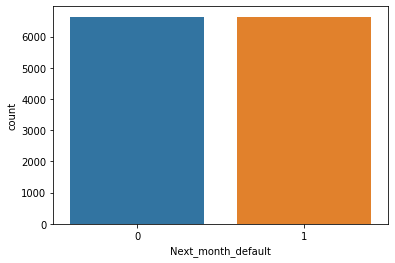

In [ ]:
sns.countplot('Next_month_default', data = undersampled_df)

Random Oversampling and Undersampling makes the model to overfit, this being the major drawback we are using SMOTE technique.

In [12]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['Next_month_default'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Original dataset shape 30000
Resampled dataset shape 46728


In [13]:
columns = list(df.columns)

In [14]:
columns.pop()

'Next_month_default'

In [15]:
resampled_df = pd.DataFrame(x_smote, columns=columns)
resampled_df['Next_month_default'] = y_smote 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


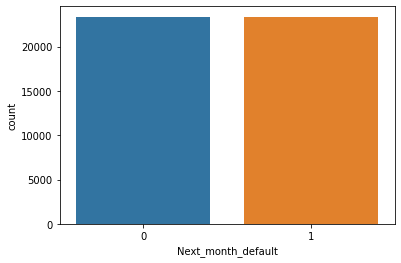

In [16]:
sns.countplot('Next_month_default', data = resampled_df)

In [11]:
df.head()

,ID,Credit_given,Gender,Education,Marriage,Age,Paymment_his_april,Paymment_his_may,Paymment_his_june,Paymment_his_july,Paymment_his_august,Paymment_his_sept,BILL_AMT_april,BILL_AMT_may,BILL_AMT_june,BILL_AMT_july,BILL_AMT_august,BILL_AMT_sept,PAY_AMT_april,PAY_AMT_may,PAY_AMT_june,PAY_AMT_july,PAY_AMT_august,PAY_AMT_sept,Next_month_default
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
resampled_df.head()

,ID,Credit_given,Gender,Education,Marriage,Age,Paymment_his_april,Paymment_his_may,Paymment_his_june,Paymment_his_july,Paymment_his_august,Paymment_his_sept,BILL_AMT_april,BILL_AMT_may,BILL_AMT_june,BILL_AMT_july,BILL_AMT_august,BILL_AMT_sept,PAY_AMT_april,PAY_AMT_may,PAY_AMT_june,PAY_AMT_july,PAY_AMT_august,PAY_AMT_sept,Next_month_default
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
resampled_df['Next_month_default'].value_counts()

1    6636
0    6636
Name: Next_month_default, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


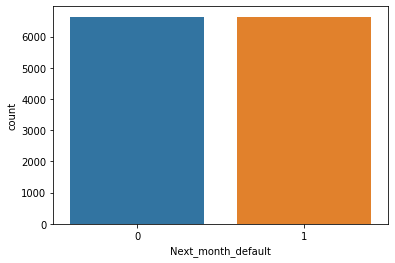

In [ ]:
sns.countplot('Next_month_default', data = resampled_df)

Perfectly Balanced..!

# Identify the Independent and dependent variable

In [17]:
target_y = df['Next_month_default']

In [18]:
target_y = target_y.astype('int')

In [15]:
feature_x = df.drop('Next_month_default',axis=1,inplace = False)
feature_x

,ID,Credit_given,Gender,Education,Marriage,Age,Paymment_his_april,Paymment_his_may,Paymment_his_june,Paymment_his_july,Paymment_his_august,Paymment_his_sept,BILL_AMT_april,BILL_AMT_may,BILL_AMT_june,BILL_AMT_july,BILL_AMT_august,BILL_AMT_sept,PAY_AMT_april,PAY_AMT_may,PAY_AMT_june,PAY_AMT_july,PAY_AMT_august,PAY_AMT_sept
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


# Feature selection

1.Information Gain
2. Correlation
3. Chi-square test
4. Select Kbest


<function matplotlib.pyplot.show>

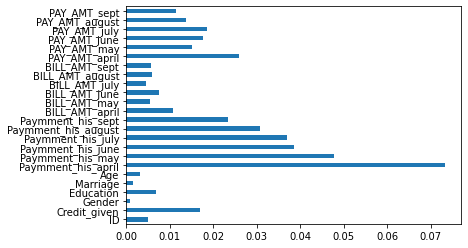

In [ ]:
from sklearn.feature_selection import mutual_info_classif
impt = mutual_info_classif(feature_x,target_y)
feat_impt = pd.Series(impt, df.columns[0:len(df.columns)-1])
feat_impt.plot(kind = 'barh')
plt.show


In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=15)
fit = bestfeatures.fit(feature_x,target_y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(feature_x.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print(featureScores.nlargest(15,'Score')) 

                Feature     Score
6    Paymment_his_april  0.076742
7      Paymment_his_may  0.049217
8     Paymment_his_june  0.038636
10  Paymment_his_august  0.031515
9     Paymment_his_july  0.031157
11    Paymment_his_sept  0.026318
18        PAY_AMT_april  0.023167
20         PAY_AMT_june  0.020267
1          Credit_given  0.015762
19          PAY_AMT_may  0.014248
22       PAY_AMT_august  0.013915
21         PAY_AMT_july  0.013390
23         PAY_AMT_sept  0.011919
12       BILL_AMT_april  0.010139
13         BILL_AMT_may  0.007108


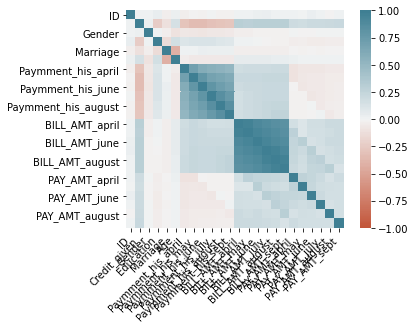

In [ ]:
#correlation heatmap
data = resampled_df.copy()
corr = data.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From all of the above, it seems to be clear that ID, gender, Marriage,Education and age doesn't seem to have much importance.


In [16]:
df.drop(['ID', 'Gender','Marriage','Education','Age'], axis = 1)


,Credit_given,Paymment_his_april,Paymment_his_may,Paymment_his_june,Paymment_his_july,Paymment_his_august,Paymment_his_sept,BILL_AMT_april,BILL_AMT_may,BILL_AMT_june,BILL_AMT_july,BILL_AMT_august,BILL_AMT_sept,PAY_AMT_april,PAY_AMT_may,PAY_AMT_june,PAY_AMT_july,PAY_AMT_august,PAY_AMT_sept,Next_month_default
1,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [17]:
resampled_df.drop(['ID', 'Gender','Marriage','Education','Age'],axis =1)

,Credit_given,Paymment_his_april,Paymment_his_may,Paymment_his_june,Paymment_his_july,Paymment_his_august,Paymment_his_sept,BILL_AMT_april,BILL_AMT_may,BILL_AMT_june,BILL_AMT_july,BILL_AMT_august,BILL_AMT_sept,PAY_AMT_april,PAY_AMT_may,PAY_AMT_june,PAY_AMT_july,PAY_AMT_august,PAY_AMT_sept,Next_month_default
0,20000.0,2.000000,2.000000,-1.000000,-1.000000,-2.000000,-2.000000,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.0,-1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.0,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,360000.0,-0.321344,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
46724,240000.0,0.975446,1.950893,1.950893,1.950893,1.950893,1.950893,124644.092188,132049.882023,133603.658931,134941.967108,132964.942924,140793.777378,10699.559841,5008.053596,4817.187553,127.654408,9886.856797,5205.328141,1
46725,20000.0,1.000000,2.000000,1.361074,1.361074,1.361074,0.000000,7312.122014,8410.084632,8537.428126,9856.155763,9870.299288,10620.836226,1361.074025,415.301884,1517.966548,319.462987,968.053701,950.629357,1
46726,30000.0,1.000000,2.329770,0.494656,0.329770,2.000000,2.164885,13194.092663,13514.547912,14080.845991,15820.956415,15469.259878,16709.341397,835.114790,1085.649227,2030.124086,197.862252,1670.229580,0.000000,1


In [18]:
feature_x = df.drop(['ID', 'Gender','Marriage','Education','Age','Next_month_default'], axis = 1)
feature_x

,Credit_given,Paymment_his_april,Paymment_his_may,Paymment_his_june,Paymment_his_july,Paymment_his_august,Paymment_his_sept,BILL_AMT_april,BILL_AMT_may,BILL_AMT_june,BILL_AMT_july,BILL_AMT_august,BILL_AMT_sept,PAY_AMT_april,PAY_AMT_may,PAY_AMT_june,PAY_AMT_july,PAY_AMT_august,PAY_AMT_sept
1,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
2,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29999,80000,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


# Machine Learning

1.Logistic Regression.

2.Logistic Regression with SMOTE.

3.Random Forest.

4.Random Forest with SMOTE.


Train Test split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_x, target_y, test_size=0.2, random_state=10)


In [20]:
#applying standarscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1.Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred_logistic = model_logistic.predict(X_test)

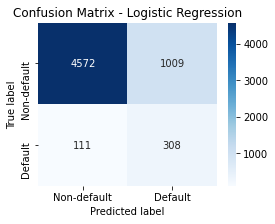

In [23]:
#confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# print(confusion_matrix(y_pred_logistic, y_test))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred_logistic,y_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_logistic, y_test))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5581
           1       0.23      0.74      0.35       419

    accuracy                           0.81      6000
   macro avg       0.61      0.78      0.62      6000
weighted avg       0.92      0.81      0.85      6000



In [25]:
accuracy_score(y_pred_logistic, y_test)

0.8133333333333334

In [26]:
print("Accuracy of Logistic Model is",(accuracy_score(y_pred_logistic, y_test)*100),"%")

Accuracy of Logistic Model is 81.33333333333333 %


Conclusion : Running a model on imbalanced dataset will yield a 80%accuracy so there is no sense of doing as this result we would get from a random guess itself.

2.Logistic Regression with SMOTE

In [27]:
feature_x = resampled_df.drop(['ID', 'Gender','Marriage','Education','Age','Next_month_default'], axis = 1)
feature_x

,Credit_given,Paymment_his_april,Paymment_his_may,Paymment_his_june,Paymment_his_july,Paymment_his_august,Paymment_his_sept,BILL_AMT_april,BILL_AMT_may,BILL_AMT_june,BILL_AMT_july,BILL_AMT_august,BILL_AMT_sept,PAY_AMT_april,PAY_AMT_may,PAY_AMT_june,PAY_AMT_july,PAY_AMT_august,PAY_AMT_sept
0,20000.0,2.000000,2.000000,-1.000000,-1.000000,-2.000000,-2.000000,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,120000.0,-1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,90000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,50000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,50000.0,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,360000.0,-0.321344,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
46724,240000.0,0.975446,1.950893,1.950893,1.950893,1.950893,1.950893,124644.092188,132049.882023,133603.658931,134941.967108,132964.942924,140793.777378,10699.559841,5008.053596,4817.187553,127.654408,9886.856797,5205.328141
46725,20000.0,1.000000,2.000000,1.361074,1.361074,1.361074,0.000000,7312.122014,8410.084632,8537.428126,9856.155763,9870.299288,10620.836226,1361.074025,415.301884,1517.966548,319.462987,968.053701,950.629357
46726,30000.0,1.000000,2.329770,0.494656,0.329770,2.000000,2.164885,13194.092663,13514.547912,14080.845991,15820.956415,15469.259878,16709.341397,835.114790,1085.649227,2030.124086,197.862252,1670.229580,0.000000


In [28]:
target_y= resampled_df['Next_month_default']

In [29]:
target_y = target_y.astype('int')

In [24]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_x, target_y, test_size=0.2, random_state=10)


In [25]:
#applying standarscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred_logistic = model_logistic.predict(X_test)

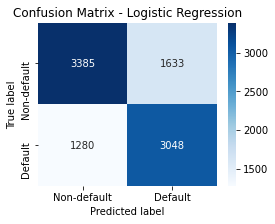

In [34]:
#confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# print(confusion_matrix(y_pred_logistic, y_test))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_pred_logistic,y_test)
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_logistic, y_test))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      5018
           1       0.65      0.70      0.68      4328

    accuracy                           0.69      9346
   macro avg       0.69      0.69      0.69      9346
weighted avg       0.69      0.69      0.69      9346



In [36]:
accuracy_score(y_pred_logistic, y_test)

0.6883158570511448

In [37]:
print("Accuracy of Logistic Model is",(accuracy_score(y_pred_logistic, y_test)*100),"%")

Accuracy of Logistic Model is 68.83158570511448 %


Random Forest Classifier Using SMOTE

In [38]:
feature_x = resampled_df.drop(['ID', 'Gender','Marriage','Education','Age','Next_month_default'], axis = 1)
feature_x


,Credit_given,Paymment_his_april,Paymment_his_may,Paymment_his_june,Paymment_his_july,Paymment_his_august,Paymment_his_sept,BILL_AMT_april,BILL_AMT_may,BILL_AMT_june,BILL_AMT_july,BILL_AMT_august,BILL_AMT_sept,PAY_AMT_april,PAY_AMT_may,PAY_AMT_june,PAY_AMT_july,PAY_AMT_august,PAY_AMT_sept
0,20000.0,2.000000,2.000000,-1.000000,-1.000000,-2.000000,-2.000000,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,120000.0,-1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,90000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,50000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,50000.0,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,360000.0,-0.321344,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
46724,240000.0,0.975446,1.950893,1.950893,1.950893,1.950893,1.950893,124644.092188,132049.882023,133603.658931,134941.967108,132964.942924,140793.777378,10699.559841,5008.053596,4817.187553,127.654408,9886.856797,5205.328141
46725,20000.0,1.000000,2.000000,1.361074,1.361074,1.361074,0.000000,7312.122014,8410.084632,8537.428126,9856.155763,9870.299288,10620.836226,1361.074025,415.301884,1517.966548,319.462987,968.053701,950.629357
46726,30000.0,1.000000,2.329770,0.494656,0.329770,2.000000,2.164885,13194.092663,13514.547912,14080.845991,15820.956415,15469.259878,16709.341397,835.114790,1085.649227,2030.124086,197.862252,1670.229580,0.000000


In [39]:
target_y=resampled_df['Next_month_default'].astype('int')

In [40]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_x, target_y, test_size=0.2, random_state=10)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
rand_frst=RandomForestClassifier(random_state=10)
rand_frst.fit(X_train,y_train)

y_pred1 = rand_frst.predict(X_test)
accuracy_rf=accuracy_score(y_test, y_pred1)
precision_rf=precision_score(y_test, y_pred1,average='weighted')
recall_rf=recall_score(y_test, y_pred1,average='weighted')
f1_rf=f1_score(y_test,y_pred1,average='weighted')
print("accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print('f1_score:',f1_rf)

accuracy: 0.864433982452386
Precision: 0.867974825566082
Recall: 0.864433982452386
f1_score: 0.8641204935901713


In [44]:
print("Accuracy of Random Forest classifier is",(accuracy_score(y_pred1, y_test)*100),"%")

Accuracy of Random Forest classifier is 86.4433982452386 %


random Forest Using GRIDSEARCH CV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
#Random Forest classifier
forest = RandomForestClassifier()           
# n_estimators = number of trees in the foreset
n_estimators = [500]    

# max_features = max number of features considered for splitting a node:
# If “auto”, then max_features=sqrt(n_features).
# If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
# # If “log2”, then max_features=log2(n_features).
max_features = ["auto",'sqrt','log2']

#applying grisd search on forest:
# Specify the grid serach params
grid_search_forest = {'n_estimators' : n_estimators, 'max_features' : max_features}
#grid search
rand_search_forest = GridSearchCV(forest, grid_search_forest, cv = 4, 
                                         refit = True, n_jobs = -1, verbose=2)

rand_search_forest.fit(X_train, y_train)


Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  5.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [47]:
random_estimator = rand_search_forest.best_estimator_

y_pred_train= random_estimator.predict(X_train)

In [48]:
y_pred1 = rand_search_forest.predict(X_test)
accuracy_rf=accuracy_score(y_test, y_pred1)
precision_rf=precision_score(y_test, y_pred1,average='weighted')
recall_rf=recall_score(y_test, y_pred1,average='weighted')
f1_rf=f1_score(y_test,y_pred1,average='weighted')
print("accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print('f1_score:',f1_rf)


accuracy: 0.8668949283115771
Precision: 0.8700777755782043
Recall: 0.8668949283115771
f1_score: 0.8666205300100147


In [49]:
print("Accuracy of Random Forest classifier with GRIDSEARCH CV is",(accuracy_score(y_pred1, y_test)*100),"%")

Accuracy of Random Forest classifier with GRIDSEARCH CV is 86.68949283115771 %


Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(random_state=10)
GB.fit(X_train,y_train)

y_pred2 = GB.predict(X_test)
accuracy_gb=accuracy_score(y_test, y_pred2)
precision_gb=precision_score(y_test, y_pred2,average='weighted')
recall_gb=recall_score(y_test, y_pred2,average='weighted')
f1_gb=f1_score(y_test,y_pred2,average='weighted')
print("accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print('f1_score:',f1_gb)

accuracy: 0.8421784720736144
Precision: 0.8539590808990349
Recall: 0.8421784720736144
f1_score: 0.8408842427031014


Gradient Boosting with GridSearch CV

In [52]:
parameters_boost ={'n_estimators' :[15,25,50],
             'min_samples_split' :[3,10,15]
}

Gradient_Boost = GridSearchCV(GradientBoostingClassifier(random_state=10), cv=10, param_grid=parameters_boost, scoring='accuracy')
Gradient_Boost.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [53]:

y_pred2 = Gradient_Boost.predict(X_test)
accuracy_gb=accuracy_score(y_test, y_pred2)
precision_gb=precision_score(y_test, y_pred2,average='weighted')
recall_gb=recall_score(y_test, y_pred2,average='weighted')
f1_gb=f1_score(y_test,y_pred2,average='weighted')
print("accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print('f1_score:',f1_gb)

accuracy: 0.8252728439974321
Precision: 0.8362095336447548
Recall: 0.8252728439974321
f1_score: 0.823874042357563


Decision Tree Classifier with GridSearchCV


In [19]:
from sklearn.tree import DecisionTreeClassifier  
# defining parameter range 
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}


In [20]:
feature_x = resampled_df.drop(['ID', 'Gender','Marriage','Education','Age','Next_month_default'], axis = 1)

In [21]:
target_y = resampled_df['Next_month_default'].astype('int')

In [26]:
scaler = StandardScaler()
feature_x = scaler.fit_transform(feature_x)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature_x, target_y, test_size=0.20, random_state=42, stratify = target_y)

In [29]:
from sklearn.model_selection import learning_curve, GridSearchCV
DT_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
DT_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    5.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                       

In [31]:
DT_clf.best_score_

0.7737681212252211

In [33]:
best_estimator = DT_clf.best_estimator_

In [37]:
# Get the predicted classes
train_class_preds = best_estimator.predict(X_train)
test_class_preds = best_estimator.predict(X_test)

In [38]:
# Get the accuracy scores
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)


print("Accuracy of Decision Tree classifier with GRIDSEARCH CV on train dataset is",(train_accuracy)*100,"%")
print("Accuracy of Decision Tree classifier with GRIDSEARCH CV on test dataset is",(test_accuracy)*100,"%")

Accuracy of Decision Tree classifier with GRIDSEARCH CV on train dataset is 77.38751270665027 %
Accuracy of Decision Tree classifier with GRIDSEARCH CV on test dataset is 77.33789856623154 %
